In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,r2_score,plot_roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [4]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.shape

(32560, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# There is no null data in any column
# Native_country , Income , Marital_status , Occupation  , Relationship , Race , Sex .Education Workclass has object type data

In [10]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [11]:
data=data.drop(columns='Fnlwgt',axis=1)
data=data.drop(columns='Education',axis=1)
## Education and Educatin_num are similar
##Fnlwgt = final weight in census model which has not relevance

In [12]:
data['Workclass'].value_counts()
## Types of WorkClasses are given

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [13]:
data['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [14]:
data['Occupation'].value_counts()
## Occupation Classes Description

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [15]:
data['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [16]:
data['Race'].value_counts()
## White People Weightage are more

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [17]:
data['Sex'].value_counts()
## More Males than Females

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [18]:
data['Native_country'].value_counts()
### More people from United States

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [19]:
data['Income'].value_counts()
## More People have lesser income than 50K

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [20]:
## Using the Label Encoder to transform the object/categorical data
labelencoder=LabelEncoder()

In [21]:
data['Workclass']=labelencoder.fit_transform(data['Workclass'])
data['Marital_status']=labelencoder.fit_transform(data['Marital_status'])
data['Occupation']=labelencoder.fit_transform(data['Occupation'])
data['Relationship']=labelencoder.fit_transform(data['Relationship'])
data['Race']=labelencoder.fit_transform(data['Race'])
data['Sex']=labelencoder.fit_transform(data['Sex'])
data['Native_country']=labelencoder.fit_transform(data['Native_country'])
data['Income']=labelencoder.fit_transform(data['Income'])

In [22]:
data.info()
## Now all Data is in Integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Education_num   32560 non-null  int64
 3   Marital_status  32560 non-null  int32
 4   Occupation      32560 non-null  int32
 5   Relationship    32560 non-null  int32
 6   Race            32560 non-null  int32
 7   Sex             32560 non-null  int32
 8   Capital_gain    32560 non-null  int64
 9   Capital_loss    32560 non-null  int64
 10  Hours_per_week  32560 non-null  int64
 11  Native_country  32560 non-null  int32
 12  Income          32560 non-null  int32
dtypes: int32(8), int64(5)
memory usage: 2.2 MB


In [23]:
x=data.drop(columns='Income',axis=1)
y=data[['Income']]

In [24]:
data.describe()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


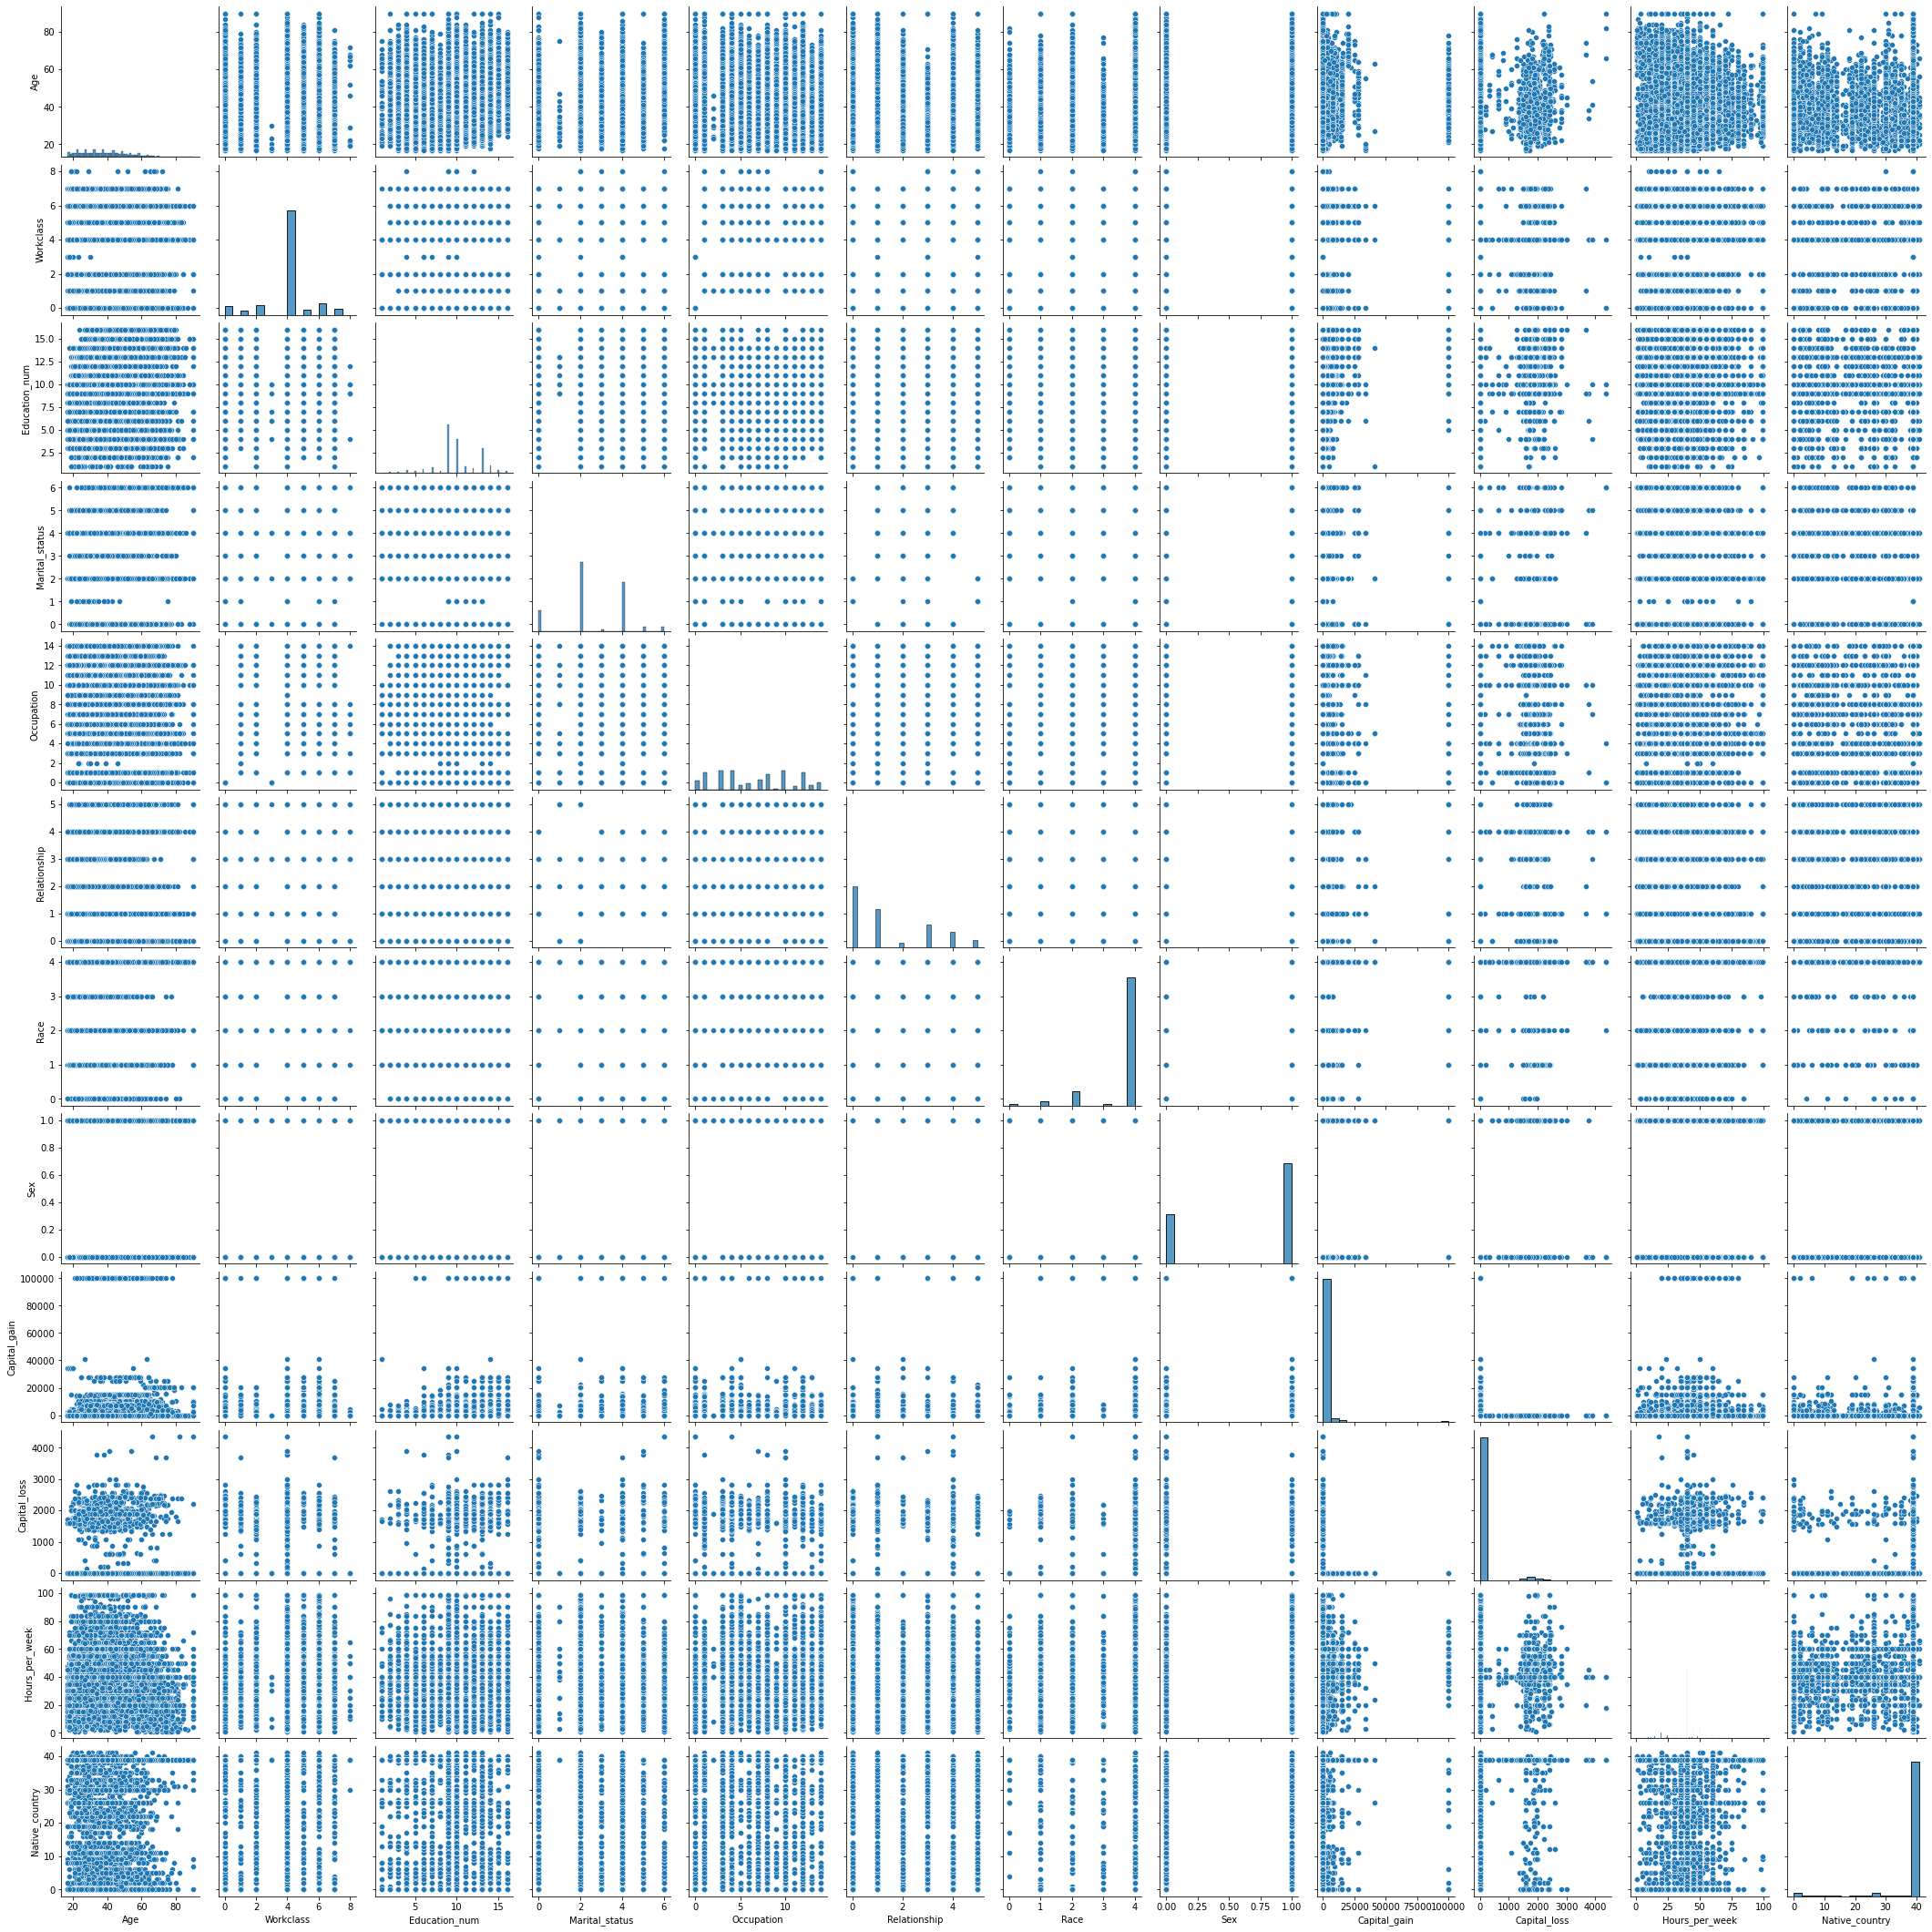

In [25]:
sns.pairplot(x)

In [26]:
x.skew()
## There are outliers because normal ranges(-0.5 to 0.5)

Age                0.558738
Workclass         -0.752280
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
dtype: float64

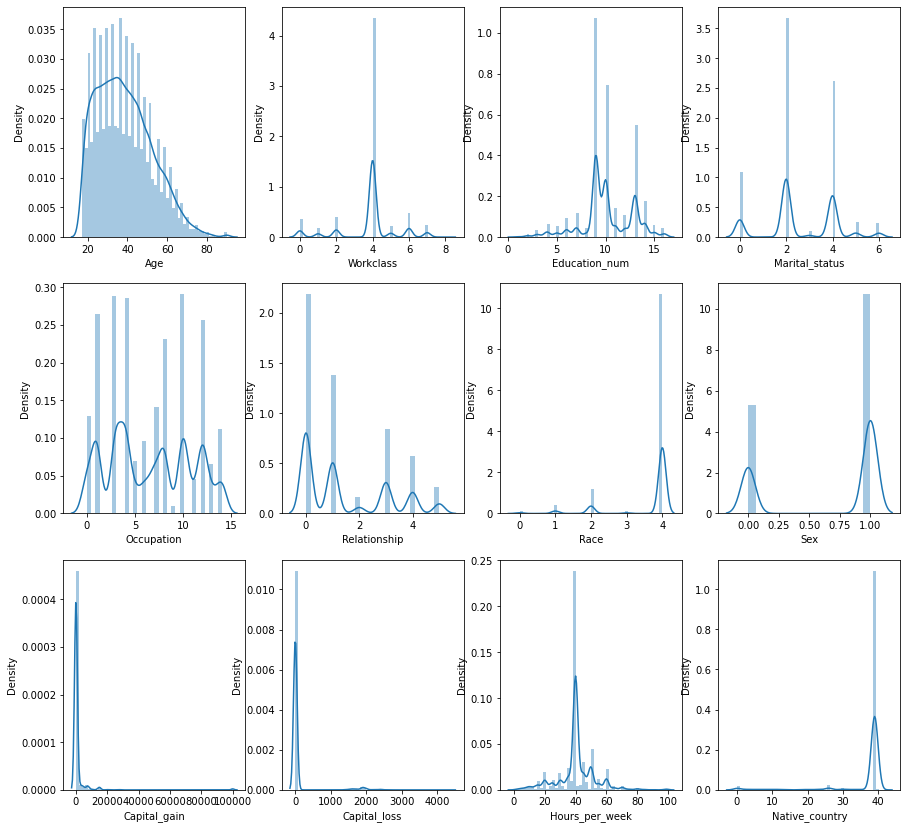

In [27]:
## for showing the skewness
plt.figure(figsize=(15,50))
plotnumber=1
for column in x:
    if plotnumber<=12:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


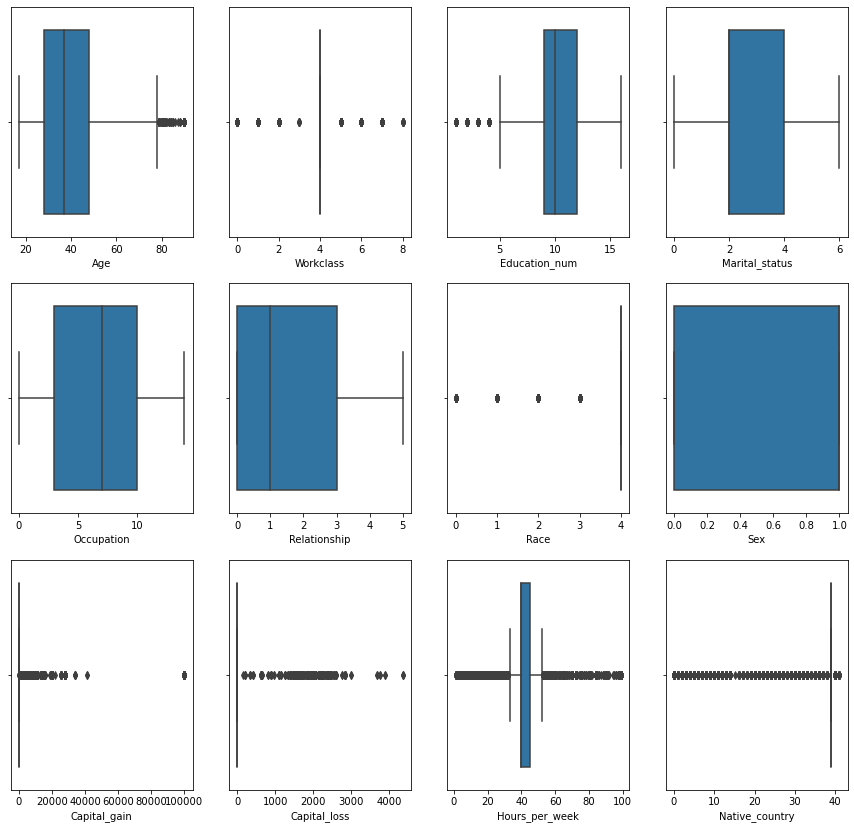

In [28]:
## for Detecting the Outliers
plt.figure(figsize=(15,50))
graph=1
for column in x:
    if graph<=12:
        ax=plt.subplot(10,4,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [29]:
## However , We should not use outliers removing in Categorical data but observations/numbers of data are 
#high in some categorical variables , So I take Native_country and Workclass.
# and Capital Gain , Capital Loss , Education_Num, Age, Hours_per_week have some outliers so need to remove
## for Capital Gain , Capital Loss I am using Outlier Deection formula
#Higher Side =Q3+(1.5*IQR)
#Lower Side=Q1-(1.5*IQR)

In [30]:
## find the IQR 
q1= data.quantile(0.25)
q3=data.quantile(0.75)
#IQR
iqr= q3-q1

In [31]:
CapG=(q3.Capital_gain+(1.5*iqr.Capital_gain))
CapG

0.0

In [32]:
index=np.where(data['Capital_gain']>CapG)
index

(array([    7,     8,    58, ..., 32537, 32547, 32559], dtype=int64),)

In [33]:
data=data.drop(data.index[index])

In [34]:
data.shape

(29849, 13)

In [35]:
data.reset_index()

,index,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,9,0,6,1,4,1,0,0,40,39,0
2,2,53,4,7,2,6,0,2,1,0,0,40,39,0
3,3,28,4,13,2,10,5,2,0,0,0,40,5,0
4,4,37,4,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29844,32554,22,4,10,4,11,1,4,1,0,0,40,39,0
29845,32555,27,4,12,2,13,5,4,0,0,0,38,39,0
29846,32556,40,4,9,2,7,0,4,1,0,0,40,39,1
29847,32557,58,4,9,6,1,4,4,0,0,0,40,39,0


In [36]:
indexn=np.where(data['Capital_loss']>(q3.Capital_loss+(1.5*iqr.Capital_loss)))
indexn

(array([   20,    29,    49, ..., 29741, 29754, 29793], dtype=int64),)

In [37]:
data=data.drop(data.index[indexn])
data.reset_index()

,index,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,6,13,2,4,0,4,1,0,0,13,39,0
1,1,38,4,9,0,6,1,4,1,0,0,40,39,0
2,2,53,4,7,2,6,0,2,1,0,0,40,39,0
3,3,28,4,13,2,10,5,2,0,0,0,40,5,0
4,4,37,4,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28325,32554,22,4,10,4,11,1,4,1,0,0,40,39,0
28326,32555,27,4,12,2,13,5,4,0,0,0,38,39,0
28327,32556,40,4,9,2,7,0,4,1,0,0,40,39,1
28328,32557,58,4,9,6,1,4,4,0,0,0,40,39,0


In [38]:
data.describe()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,28330.000000,28330.000000,28330.000000,28330.000000,28330.000000,28330.000000,28330.000000,28330.000000,28330.0,28330.0,28330.000000,28330.000000,28330.000000
mean,37.894317,3.856795,9.938722,2.655065,6.531133,1.508119,3.655771,0.654818,0.0,0.0,39.992340,36.703318,0.190293
std,13.588255,1.455422,2.527044,1.531245,4.235692,1.599475,0.857800,0.475436,0.0,0.0,12.304598,7.806910,0.392539
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000
25%,27.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.0,0.0,39.000000,39.000000,0.000000
50%,36.000000,4.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.0,0.0,40.000000,39.000000,0.000000
75%,47.000000,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.0,0.0,45.000000,39.000000,0.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,0.0,0.0,99.000000,41.000000,1.000000


In [39]:
## By using Zscore
from scipy.stats import zscore
z_score= zscore(data[['Education_num','Age','Hours_per_week','Native_country','Workclass']])
abs_z_score= np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
datanew=data[filtering_entry]
datanew.describe()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.0,26404.0,26404.000000,26404.000000,26404.000000
mean,37.562491,3.858734,9.995645,2.648500,6.521777,1.516664,3.666831,0.652363,0.0,0.0,39.645622,38.297493,0.190956
std,13.260639,1.449853,2.392708,1.533189,4.249734,1.600994,0.844097,0.476229,0.0,0.0,11.144809,3.113844,0.393062
min,17.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,4.000000,14.000000,0.000000
25%,27.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.0,0.0,40.000000,39.000000,0.000000
50%,36.000000,4.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.0,0.0,40.000000,39.000000,0.000000
75%,47.000000,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.0,0.0,45.000000,39.000000,0.000000
max,78.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,0.0,0.0,76.000000,41.000000,1.000000


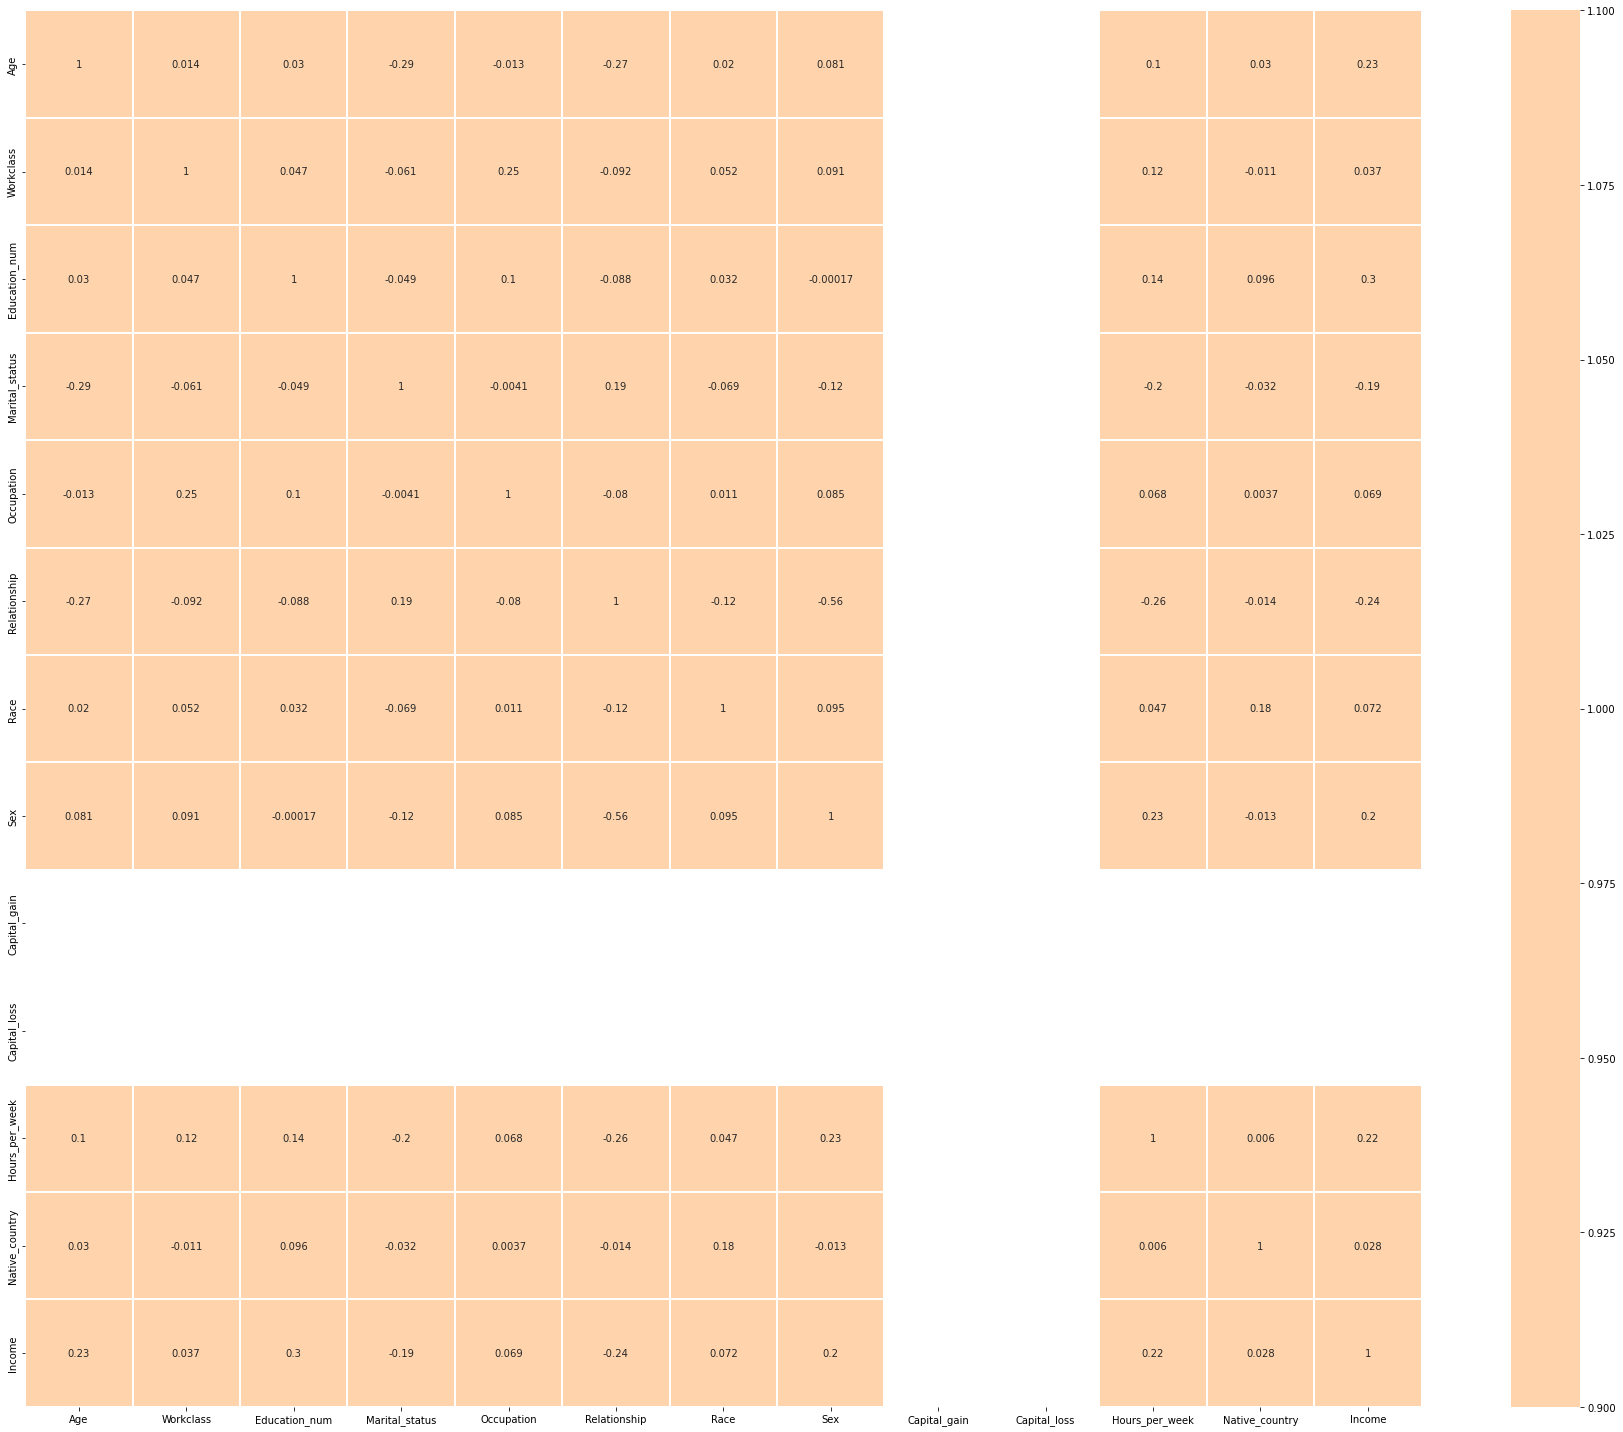

In [40]:
datanew_corr=datanew.corr()
plt.figure(figsize=(25,20))
sns.heatmap(datanew_corr,vmin=1,vmax=1,annot=True,square=True,center=0,fmt='0.2g',linewidths=.1)
plt.tight_layout()


In [41]:
## By Removing Outliers from Capital Gain and Capital Loss These have become zero, 
#so i am removing these two columns also
x1=datanew.drop(columns='Income',axis=1)
x1=datanew.drop(columns='Capital_gain',axis=1)
x1=datanew.drop(columns='Capital_loss',axis=1)
y1=datanew[['Income']]

In [42]:
scalar=StandardScaler()
X=scalar.fit_transform(x1)
X

array([[ 0.93794459,  1.47691288,  1.25565371, ..., -2.39090031,
         0.22561195, -0.48582568],
       [ 0.03299371,  0.09743686, -0.41612415, ...,  0.0317982 ,
         0.22561195, -0.48582568],
       [ 1.1641823 ,  0.09743686, -1.25201307, ...,  0.0317982 ,
         0.22561195, -0.48582568],
       ...,
       [ 0.18381886,  0.09743686, -0.41612415, ...,  0.0317982 ,
         0.22561195,  2.05835147],
       [ 1.54124517,  0.09743686, -0.41612415, ...,  0.0317982 ,
         0.22561195, -0.48582568],
       [-1.17360745,  0.09743686, -0.41612415, ..., -1.76279329,
         0.22561195, -0.48582568]])

In [43]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=x1.columns
vif

,vif,features
0,1.201432,Age
1,1.089266,Workclass
2,1.136384,Education_num
3,1.151523,Marital_status
4,1.085888,Occupation
5,1.650215,Relationship
6,1.058206,Race
7,1.530435,Sex
8,NaN,Capital_gain
9,1.155688,Hours_per_week


In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,y1,test_size=0.20,random_state=51)

In [45]:
x_train.shape, x_test.shape

((21123, 12), (5281, 12))

In [46]:
Regression=LogisticRegression()
Regression.fit(x_train,y_train)

LogisticRegression()

In [47]:
Regression.score(x_train,y_train)

1.0

In [48]:
Regression.score(x_test,y_test)

1.0

##Logistic Regression is giving 100% Accuracy

In [49]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [50]:
## We can see that Type I and Type II Errors Both are very low
cfm= confusion_matrix(y_test,y_pred)
cfm

array([[4261,    0],
       [   4, 1016]], dtype=int64)

In [51]:
## Accuracy is one hence 100% Score
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4261
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      5281
   macro avg       1.00      1.00      1.00      5281
weighted avg       1.00      1.00      1.00      5281



In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
lr=LogisticRegression()
kn=KNeighborsClassifier()

In [53]:
## Training with These Classifiers
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
lr.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
## Check The Scores
dt.score(x_test,y_test)

1.0

In [55]:
rf.score(x_test,y_test)

1.0

In [56]:
lr.score(x_test,y_test)

1.0

In [57]:
kn.score(x_test,y_test)

0.9992425676955122

In [58]:
## ROC AUC Curve Scoring
roc_auc_score(y_test,rf.predict(x_test))

1.0

In [59]:
roc_auc_score(y_test,lr.predict(x_test))

1.0

In [60]:
roc_auc_score(y_test,kn.predict(x_test))

0.9980392156862745

In [61]:
roc_auc_score(y_test,dt.predict(x_test))

1.0

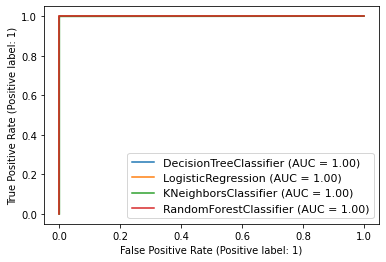

In [62]:
disp =plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [63]:
## Hence All Machine Learning Models are Working Well for this Data ; 
#All are giving Approx 100% accuracy